# ELI5 Image Classifier Explained Example

## Installation

In [1]:
!pip install eli5

     |████████████████████████████████| 112kB 6.8MB/s 


## Load keras model

In [2]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

import keras
from keras.applications import mobilenet_v2

from PIL import Image
from IPython.display import display
import numpy as np

import eli5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
model = mobilenet_v2.MobileNetV2(include_top=True, weights='imagenet')
dims = model.input_shape[1:3] 

14540800/14536120 [==============================] - 0s 0us/step


In [4]:
!wget https://github.com/TannerGilbert/Model-Interpretation/raw/master/images/cat.jpg

--2021-03-27 22:50:02--  https://github.com/TannerGilbert/Model-Interpretation/raw/master/images/cat.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TannerGilbert/Model-Interpretation/master/images/cat.jpg [following]
--2021-03-27 22:50:02--  https://raw.githubusercontent.com/TannerGilbert/Model-Interpretation/master/images/cat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18668 (18K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>]  18.23K  --.-KB/s    in 0s      

2021-03-27 22:50:02 (92.5 MB/s) - ‘cat.jpg’ saved [18668/18668]



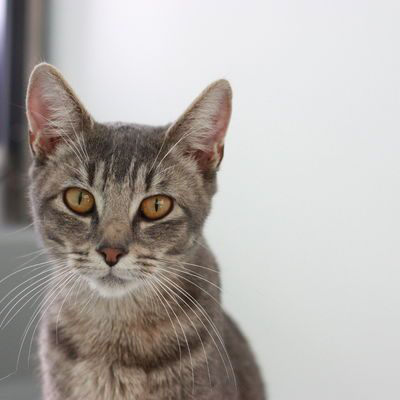

In [5]:
im = Image.open('cat.jpg')
display(im)

In [6]:
im = keras.preprocessing.image.load_img('cat.jpg', target_size=dims)
doc = keras.preprocessing.image.img_to_array(im)
doc = np.expand_dims(doc, axis=0)
mobilenet_v2.preprocess_input(doc)

array([[[[ 0.92156863,  0.84313726,  1.        ],
         [ 0.77254903,  0.73333335,  0.90588236],
         [ 0.5137255 ,  0.52156866,  0.6627451 ],
         ...,
         [ 0.81960785,  0.81960785,  0.8352941 ],
         [ 0.81960785,  0.81960785,  0.8352941 ],
         [ 0.81960785,  0.81960785,  0.8352941 ]],

        [[ 0.92156863,  0.84313726,  1.        ],
         [ 0.75686276,  0.7176471 ,  0.8901961 ],
         [ 0.49803925,  0.5058824 ,  0.64705884],
         ...,
         [ 0.81960785,  0.81960785,  0.8352941 ],
         [ 0.81960785,  0.81960785,  0.8352941 ],
         [ 0.81960785,  0.81960785,  0.8352941 ]],

        [[ 0.90588236,  0.84313726,  1.        ],
         [ 0.7411765 ,  0.7019608 ,  0.8745098 ],
         [ 0.47450984,  0.48235297,  0.62352943],
         ...,
         [ 0.81960785,  0.81960785,  0.8352941 ],
         [ 0.81960785,  0.81960785,  0.8352941 ],
         [ 0.81960785,  0.81960785,  0.8352941 ]],

        ...,

        [[-0.04313725, -0.02745098, -0

## Explain predictions using Grad-CAM

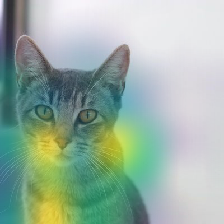

In [7]:
eli5.show_prediction(model, doc)